In [1]:
import numpy as np
import torch
from pathlib import Path
from noise2inverse import tiffs, noise, fig
import tifffile
import skimage.metrics as skm
import matplotlib.pyplot as plt

In [2]:
noisy_dir = "reconstructions/noisy"
clean_dir = "reconstructions/clean"
output_dir = "denoised"

In [3]:
noisy = tiffs.load_stack(tiffs.glob(noisy_dir))
clean = tiffs.load_stack(tiffs.glob(clean_dir))
output = tiffs.load_stack(tiffs.glob(output_dir))

512it [00:00, 2385.88it/s]
512it [00:00, 2165.46it/s]
512it [00:00, 2366.32it/s]


In [4]:
data_range = clean.max() - clean.min()

psnr_full = skm.peak_signal_noise_ratio(clean, output, data_range=data_range)
ssim_full = skm.structural_similarity(clean, output, data_range=data_range)

In [5]:
psnr_slice = skm.peak_signal_noise_ratio(clean[256], output[256], data_range=data_range)
ssim_slice = skm.structural_similarity(clean[256], output[256], data_range=data_range)

In [8]:
print(f"      Volume | Central slice")
print("-----------------------------")
print(f"PSNR:  {psnr_full:5.2f} |  {psnr_slice:5.2f}")
print(f"SSIM:  {ssim_full:5.2f} |  {ssim_slice:5.2f}")

      Volume | Central slice
-----------------------------
PSNR:  21.33 |  21.31
SSIM:   0.77 |   0.73


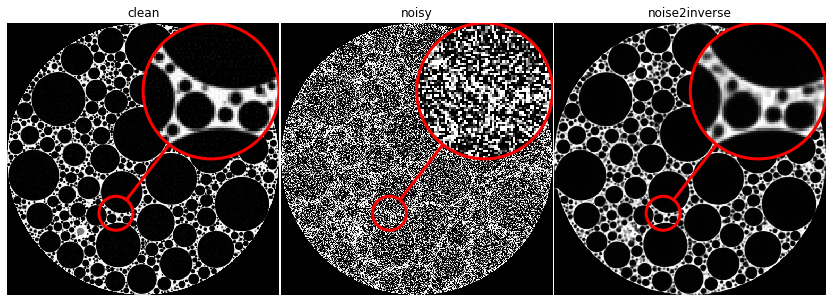

In [9]:
fig.plot_imgs(
    clean=clean[256],
    noisy=noisy[256],
    noise2inverse=output[256],
    vmin=0,
    vmax=0.004,
    width=15,
)
import matplotlib.patches as patches

axes = plt.gcf().axes
for ax in axes[:3]:
    fig.add_zoom_bubble(ax.images[0], roi=(.4, .3), zoom=4, inset_radius=.25)